In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import backend as K
from tensorflow.keras import layers

In [3]:
file_path = '/content/drive/MyDrive/ALRA_imputeddata_GSE158631.csv'
data = pd.read_csv(file_path)
data.head()

,Unnamed: 0,GC1-TT1,GC1-TT2,GC1-TT3,GC1-TT4,GC1-TT5,GC1-TT6,GC1-TT7,GC1-TT8,GC1-TT9,...,GC3-LN3,GC3-LN4,GC3-LN5,GC3-LN6,GC3-LN7,GC3-LN8,GC3-LN9,GC3-LN10,GC3-LN11,GC3-LN12
0,THY1,0.174156,0.028811,0.283023,0.115205,-0.134271,0.551128,-0.002985,0.467462,0.675702,...,0.876708,0.474856,0.524573,0.752676,0.492134,0.606718,0.795894,0.636847,0.212165,-0.246732
1,DCN,0.453123,0.035038,-0.071625,-0.009556,0.098320,0.356060,15.018967,1.151299,2.081322,...,0.683584,0.608379,0.454556,0.211362,0.425170,0.435143,0.463977,0.539372,-0.196408,-0.019069
2,COL1A1,1.833253,0.140357,0.104239,0.161467,0.217192,0.529308,53.043320,0.946988,2.139018,...,1.508562,0.861648,0.757270,0.812849,0.493518,0.576998,1.071841,0.802587,1.312028,-0.265925
3,COL1A2,2.326360,1.254713,1.415223,10.234666,5.311706,1.045942,54.018820,5.296579,12.576454,...,1.997822,1.722225,0.933299,3.163547,0.956660,2.789572,2.156758,0.988352,1.790123,-0.739009
4,COL6A1,0.685111,-0.003130,0.007352,0.041486,0.090233,0.000507,38.004208,0.800433,0.830064,...,0.090560,0.062829,0.111111,0.006491,0.072432,0.062333,0.108787,-0.022793,-0.065450,0.111753


In [4]:
# Check the data types of the columns to find non-numeric columns
print(data.dtypes)

Unnamed: 0     object
GC1-TT1       float64
GC1-TT2       float64
GC1-TT3       float64
GC1-TT4       float64
               ...   
GC3-LN8       float64
GC3-LN9       float64
GC3-LN10      float64
GC3-LN11      float64
GC3-LN12      float64
Length: 95, dtype: object


In [5]:
# Drop non-numeric columns (such as gene names or metadata)
# Assuming the first column might be non-numeric (gene names)
data_numeric = data.select_dtypes(include=[np.number])

In [6]:
# Normalize the numeric data using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

In [7]:
# Check the shape of the processed data
print(f"Processed data shape: {data_scaled.shape}")

Processed data shape: (21196, 94)


# METHOD 1: A basic feedforward autoencoder with two hidden layers in both the encoder and decoder

In [8]:
# Define the Autoencoder
input_dim = data_scaled.shape[1]
encoding_dim = 64  # Reduced dimensionality

In [9]:
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
latent = Dense(encoding_dim, activation='relu')(encoded)

In [10]:
decoded = Dense(128, activation='relu')(latent)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

In [11]:
# Build the autoencoder model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [12]:
#Train the autoencoder
history = autoencoder.fit(data_scaled, data_scaled, epochs= 100, batch_size=256, shuffle=True, validation_split=0.2)

Epoch 1/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 1.1117 - val_loss: 0.5724
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0410 - val_loss: 0.5458
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6390 - val_loss: 0.5235
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8075 - val_loss: 0.5126
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7897 - val_loss: 0.5000
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6566 - val_loss: 0.4920
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8258 - val_loss: 0.4879
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6873 - val_loss: 0.4852
Epoch 9/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7289 - val_loss: 0.4801
Epoch 10/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8440 - val_loss: 0.4773
Epoch 11/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7500 - val_loss: 0.4753
Epoch 12/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.

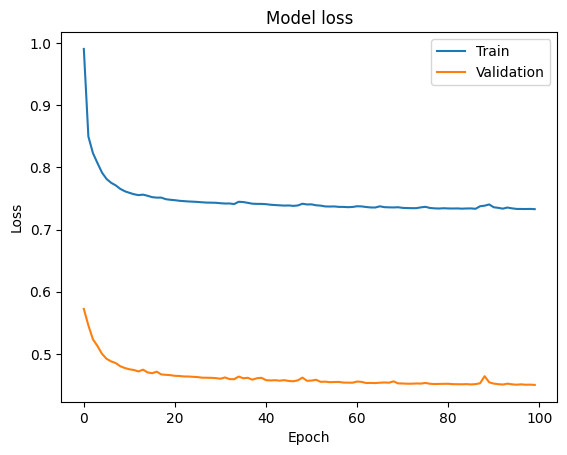

In [13]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [14]:
#Use the encoder part of the autoencoder for dimensionality reduction
encoder = Model(input_layer, latent)
encoded_data = encoder.predict(data_scaled)

663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [27]:
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(encoded_data)

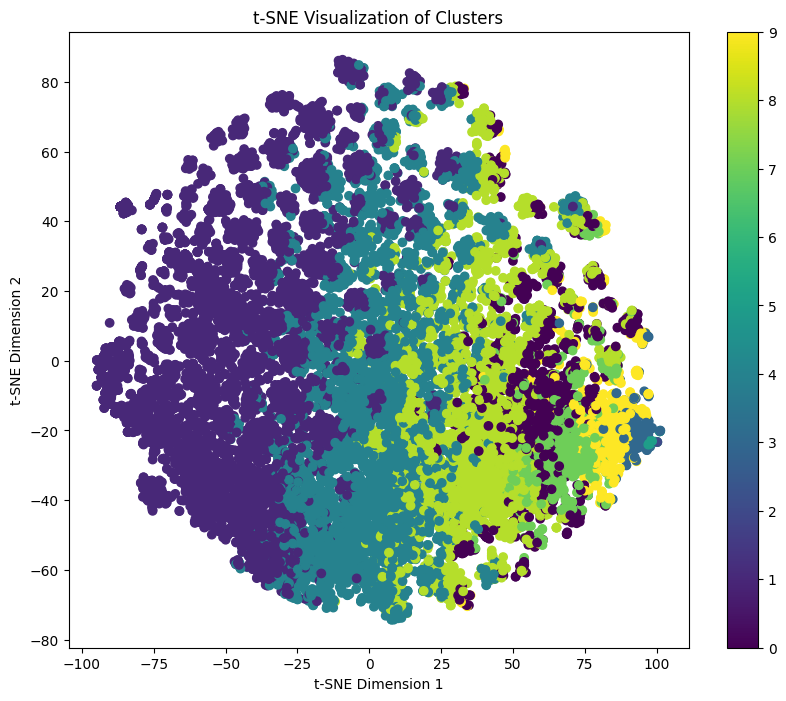

In [22]:
#Visualize the clusters using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(encoded_data)


plt.figure(figsize=(10, 8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=clusters, cmap='viridis')
plt.colorbar()
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title('t-SNE Visualization of Clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


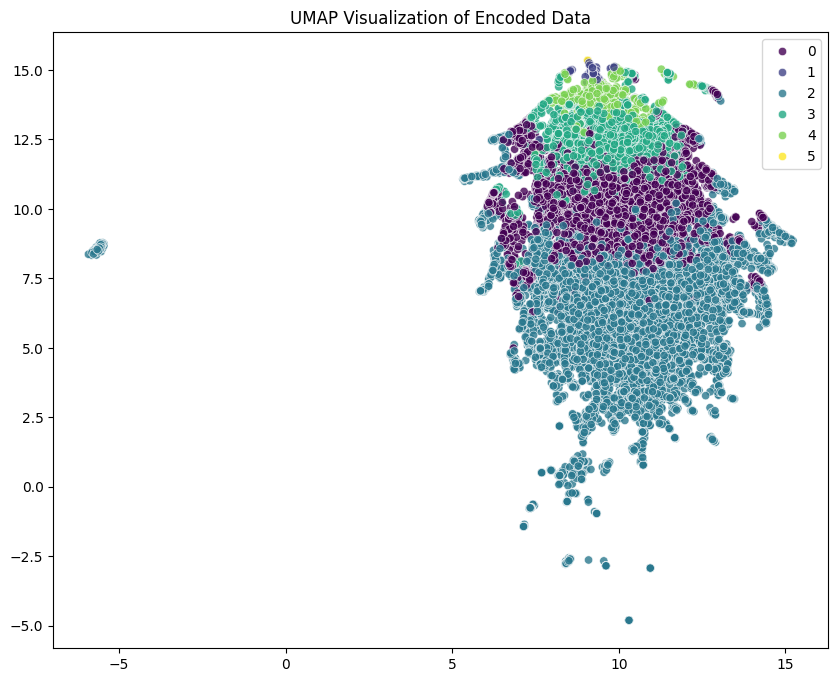

In [28]:
# Visualize the encoded data using t-SNE or UMAP
import umap
import seaborn as sns

reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(encoded_data)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=clusters, palette='viridis', alpha=0.8)
plt.title('UMAP Visualization of Encoded Data')
plt.show()

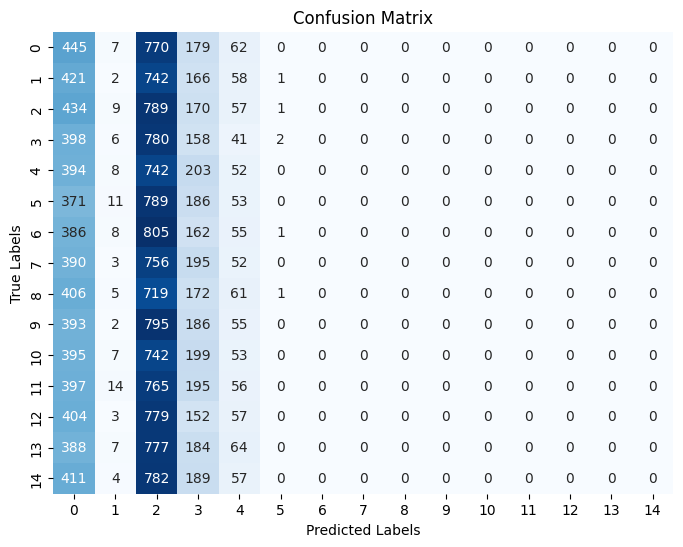

In [31]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


num_samples = len(clusters)
# Generate true labels for the test set (X_test) with the same size as clusters
true_labels = np.random.randint(0, 15, size=num_samples)

#Confusion Matrix
conf_matrix = confusion_matrix(true_labels, clusters)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=np.arange(15), yticklabels=np.arange(15))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### Optional: We can also use PCA to visualize

In [32]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(encoded_data)

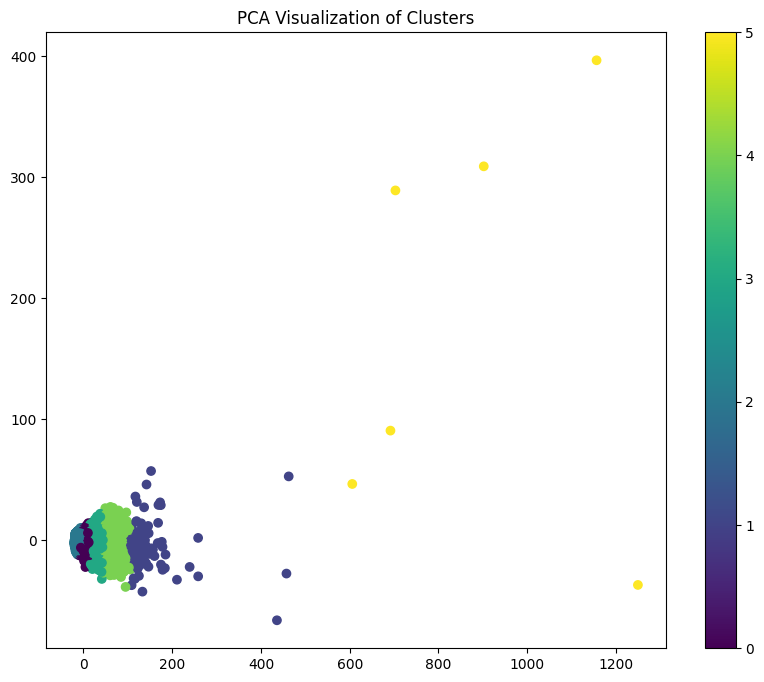

In [33]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')
plt.colorbar()
plt.title('PCA Visualization of Clusters')
plt.show()

# METHOD 2: Using deep clustering network(DCN)

In [34]:
# Define the Deep Clustering Network (DCN)

# Encoder network
input_dim = data_scaled.shape[1]
encoding_dim = 64  # Bottleneck layer dimension
input_layer = Input(shape=(input_dim,))
encoder = Dense(128, activation='relu')(input_layer)
encoder = Dense(64, activation='relu')(encoder)
latent = Dense(encoding_dim, activation='relu')(encoder)

# Decoder network
decoder = Dense(64, activation='relu')(latent)
decoder = Dense(128, activation='relu')(decoder)
output_layer = Dense(input_dim, activation='sigmoid')(decoder)

In [35]:
# Build the autoencoder model
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

history = autoencoder.fit(data_scaled, data_scaled, epochs=100, batch_size=256, shuffle=True, validation_split=0.2)

Epoch 1/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.1253 - val_loss: 0.5815
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8465 - val_loss: 0.5579
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2561 - val_loss: 0.5407
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8155 - val_loss: 0.5235
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8525 - val_loss: 0.5101
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8133 - val_loss: 0.5031
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7362 - val_loss: 0.4959
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7209 - val_loss: 0.4920
Epoch 9/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7128 - val_loss: 0.4890
Epoch 10/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6021 - val_loss: 0.4860
Epoch 11/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6725 - val_loss: 0.4841
Epoch 12/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

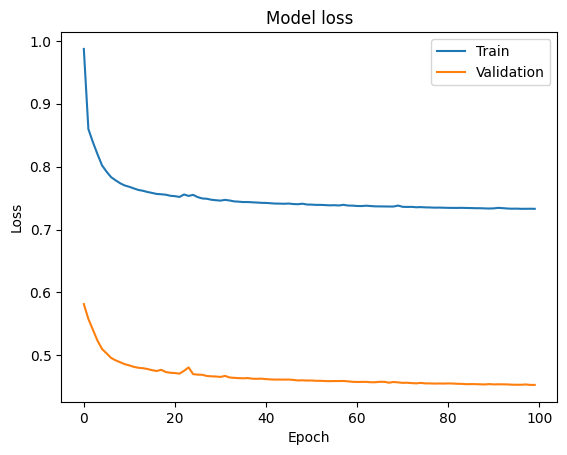

In [36]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [37]:
# Extract the encoder part to obtain the latent space representation
encoder_model = Model(input_layer, latent)
encoded_data = encoder_model.predict(data_scaled)

663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [38]:
# Initialize and train K-Means on the latent space
n_clusters = 15
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(encoded_data)
clusters = kmeans.predict(encoded_data)
cluster_centers = kmeans.cluster_centers_

In [39]:
# Visualize the Clusters using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(encoded_data)

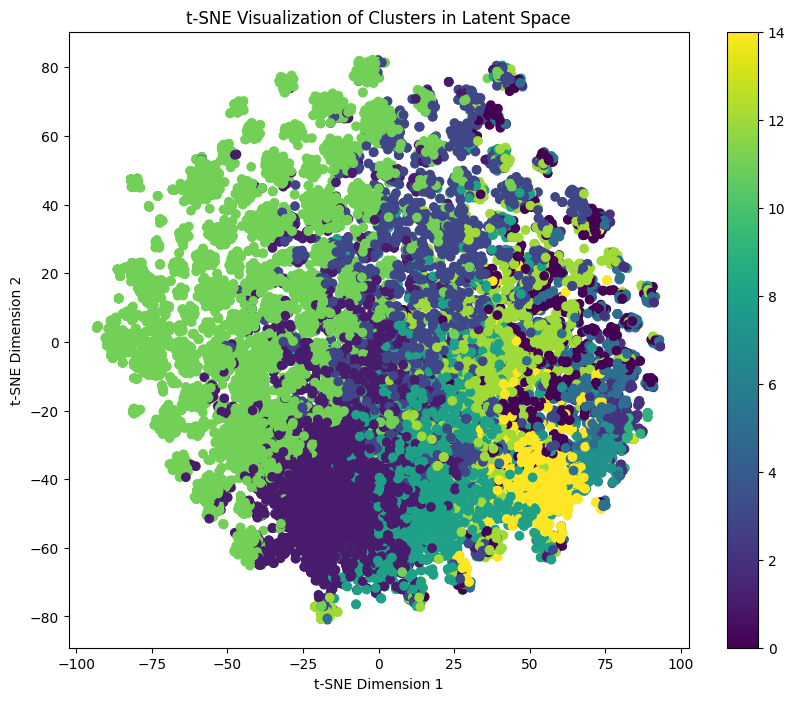

In [40]:
plt.figure(figsize=(10, 8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=clusters, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of Clusters in Latent Space')
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

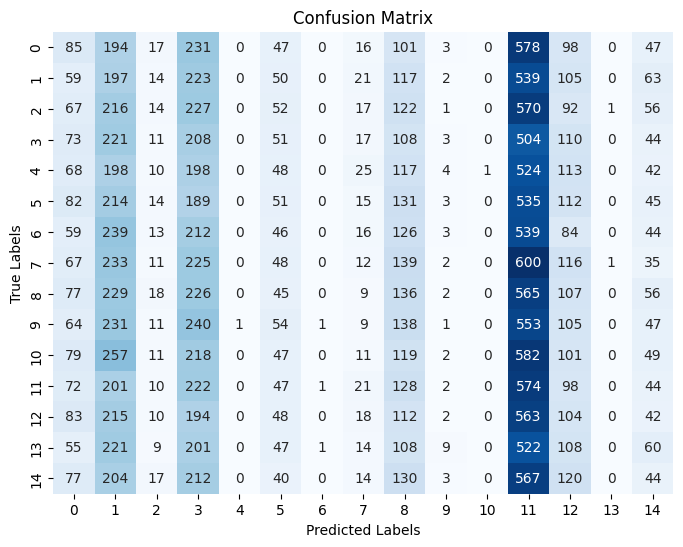

In [41]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


num_samples = len(clusters)
# Generate true labels for the test set (X_test) with the same size as clusters
true_labels = np.random.randint(0, 15, size=num_samples)

#Confusion Matrix
conf_matrix = confusion_matrix(true_labels, clusters)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=np.arange(15), yticklabels=np.arange(15))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()